In [1]:
import pandas
import cellrank as cr
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt

In [2]:
adata = sc.read('data/processed_epithelial.h5ad')

In [3]:
scv.pp.neighbors(adata, n_pcs=30, n_neighbors=30)

computing neighbors
    finished (0:01:43) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


# Choose root

In [4]:
sc.tl.diffmap(adata)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/lib/python3/dist-packages/ipykernel/pylab/backend_inline.py:18: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display
/usr/lib/python3/dist-packages/ipykernel/pylab/backend_inline.py:164: DeprecationWarning: `configure_inline_support` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.configure_inline_support()`
  configure_inline_support(ip, backend)


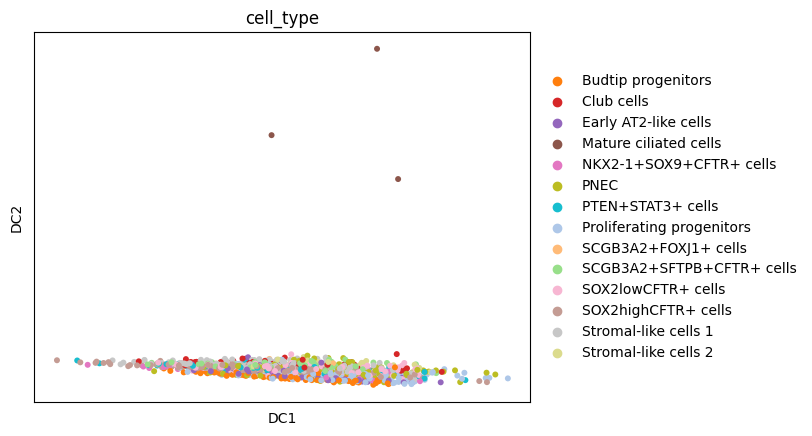

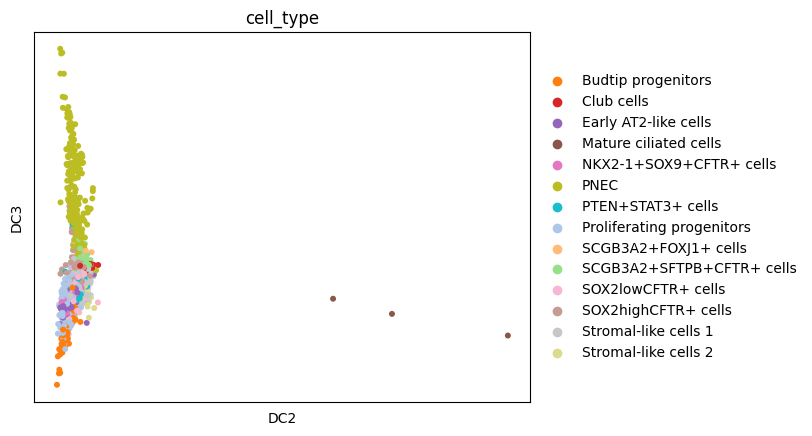

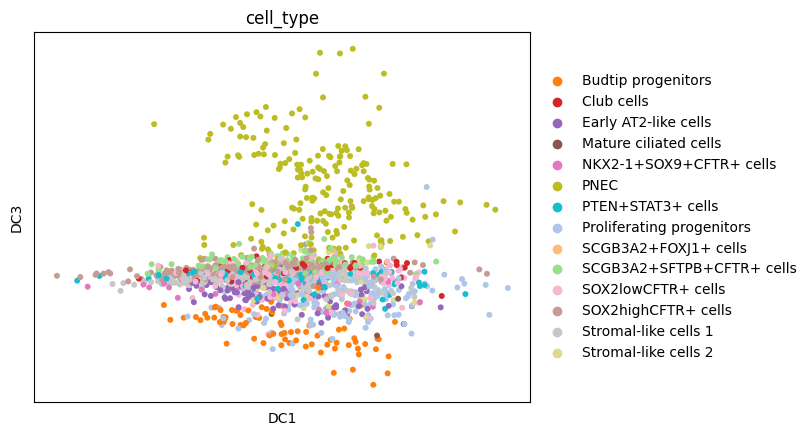

In [5]:
sc.pl.diffmap(adata[adata.obs['sample_week'] == 'week_10'], color=['cell_type'], components='1,2')
sc.pl.diffmap(adata[adata.obs['sample_week'] == 'week_10'], color=['cell_type'], components='2,3')
sc.pl.diffmap(adata[adata.obs['sample_week'] == 'week_10'], color=['cell_type'], components='1,3')

In [6]:
root_ixs = adata[adata.obs['sample_week'] == 'week_10'].obsm['X_diffmap'][:, 2].argmin()

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
start_cell = adata.obs.index.values[root_ixs]
start_cell

'ACGGTCGCAGACGATG-1_2'

In [8]:
root_list = []
for index in adata.obs.index.values:
    if index == start_cell:
        root_list.append('start')
    else:
        root_list.append('not')
adata.obs['root'] = root_list
adata.obs['root'] = adata.obs['root'].astype('category')

In [9]:
adata.obs.loc[start_cell]

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Clusters                              0
_X                            25.748585
_Y                           -13.995604
batch                                 1
cell_type            Budtip progenitors
cell_type_num    Budtip progenitors (1)
sample_week                     week_10
UMAP1                         -0.588048
UMAP2                         -8.825656
GW                                 10.2
GD                            10.285714
time_groups                    GW 10-13
root                              start
Name: ACGGTCGCAGACGATG-1_2, dtype: object

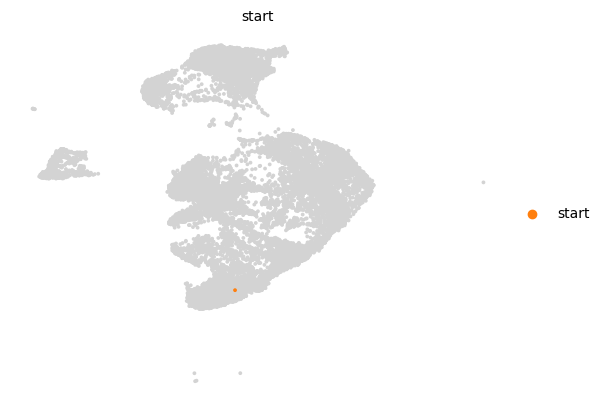

In [10]:
scv.pl.umap(
    adata,
    color='root', groups=['start'],
    legend_loc="right", size=30
)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


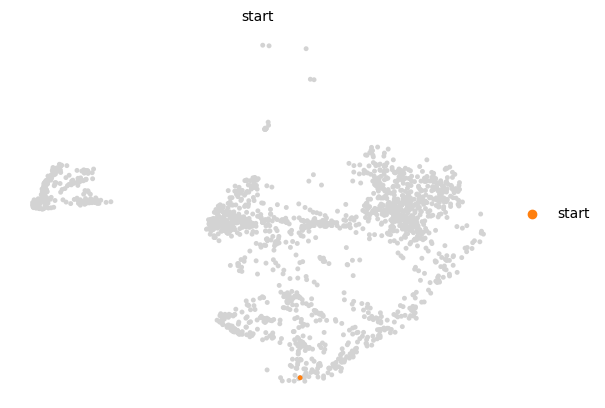

In [11]:
scv.pl.umap(
    adata[adata.obs.sample_week.isin(['week_10'])], 
    color='root', groups=['start'],
    legend_loc="right", size=50
)

# Palantir analysis

In [12]:
import scanpy.external as sce
sce.tl.palantir(adata, n_components=5, knn=30, impute_data=False)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/spencer/.local/lib/python3.8/site-packages/phenograph/cluster.py:13: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


Determing nearest neighbor graph...


In [13]:
pr_res = sce.tl.palantir_results(
adata,
early_cell=start_cell,
ms_data='X_palantir_multiscale',
num_waypoints=500,
    use_early_cell_as_start=True
)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sampling and flocking waypoints...
Time for determining waypoints: 0.010882651805877686 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...


/home/spencer/.local/lib/python3.8/site-packages/networkx/convert.py:157: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)


Time for shortest paths: 0.20260274410247803 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [14]:
pr_res.branch_probs.values.shape

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(14915, 3)

In [15]:
adata.obs['branch_probs1'] = pr_res.branch_probs.values[:,0]
adata.obs['branch_probs2'] = pr_res.branch_probs.values[:,1]
adata.obs['branch_probs3'] = pr_res.branch_probs.values[:,2]

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


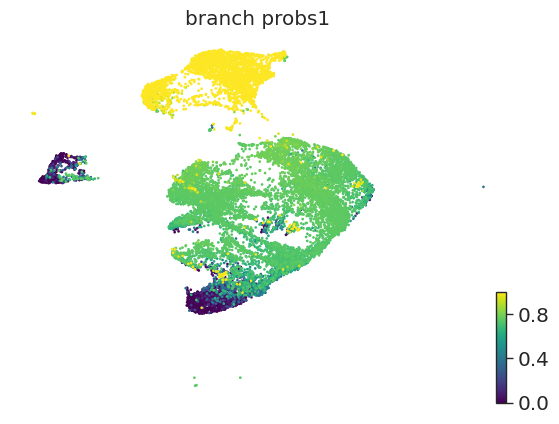

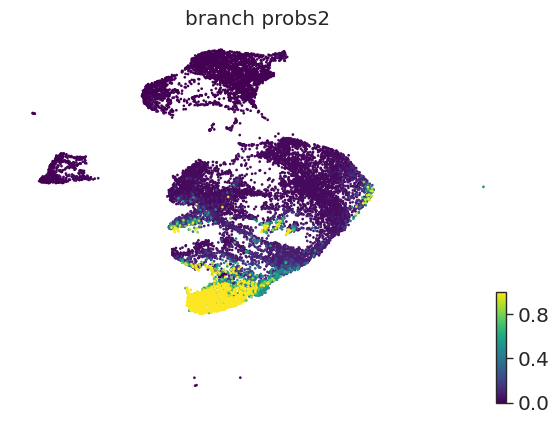

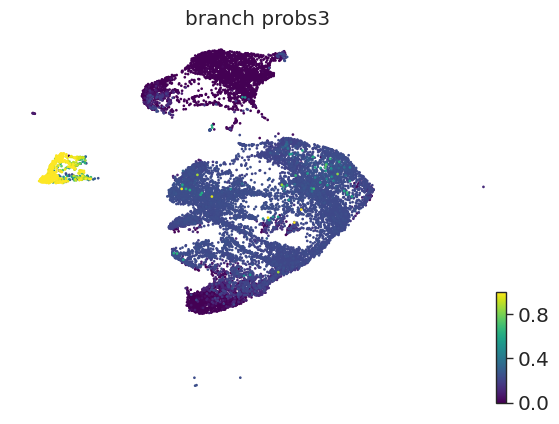

In [16]:
scv.pl.umap(adata, color=['branch_probs1'],
            color_map='viridis',  size=15)
scv.pl.umap(adata, color=['branch_probs2'], 
            color_map='viridis', size=15)
scv.pl.umap(adata, color=['branch_probs3'], 
            color_map='viridis', size=15)

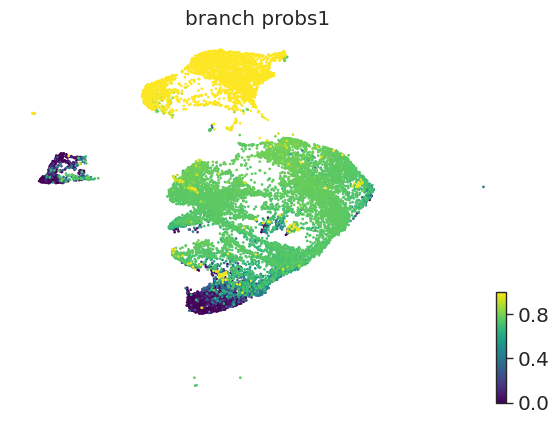

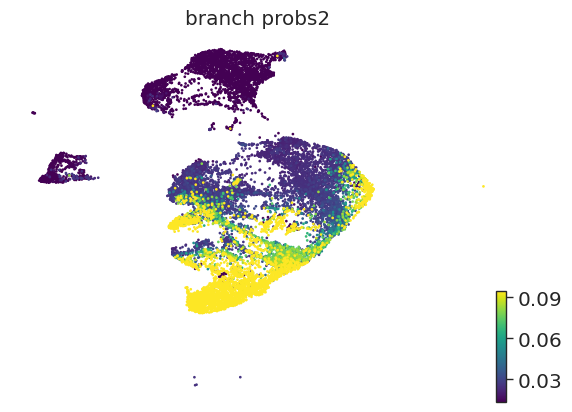

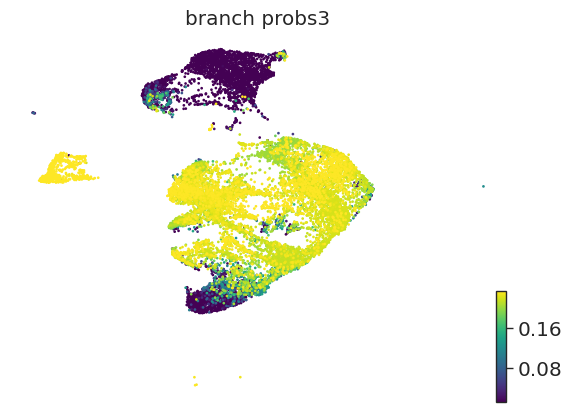

In [17]:
scv.pl.umap(adata, color=['branch_probs1'],
            color_map='viridis', perc=[0,90], size=15)
scv.pl.umap(adata, color=['branch_probs2'], 
            color_map='viridis', perc=[25,80], size=15)
scv.pl.umap(adata, color=['branch_probs3'],
            color_map='viridis', perc=[25,90], size=15)

In [18]:
adata.obs['palantir_pseudotime'] = pr_res.pseudotime

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


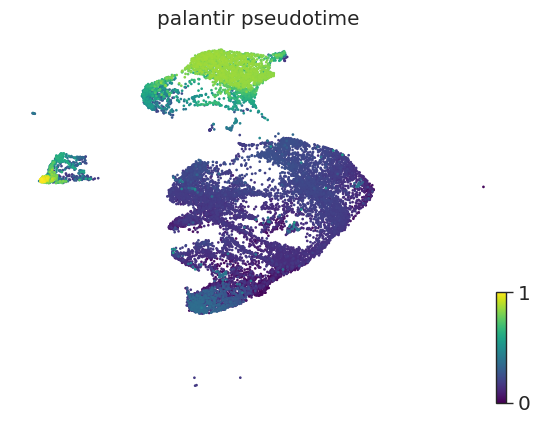

In [19]:
scv.pl.umap(adata, color=['palantir_pseudotime'],
            color_map='viridis', size=15)

# CellRank analysis

In [20]:
import cellrank as cr
pk = cr.kernels.PseudotimeKernel(adata, 
                                 time_key='palantir_pseudotime').compute_transition_matrix(threshold_scheme='soft') 
ck = cr.kernels.ConnectivityKernel(adata).compute_transition_matrix()

  0%|          | 0/14915 [00:00<?, ?cell/s]

In [21]:
k = 0.5*ck + 0.5*pk

In [22]:
g = cr.estimators.GPCCA(k)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


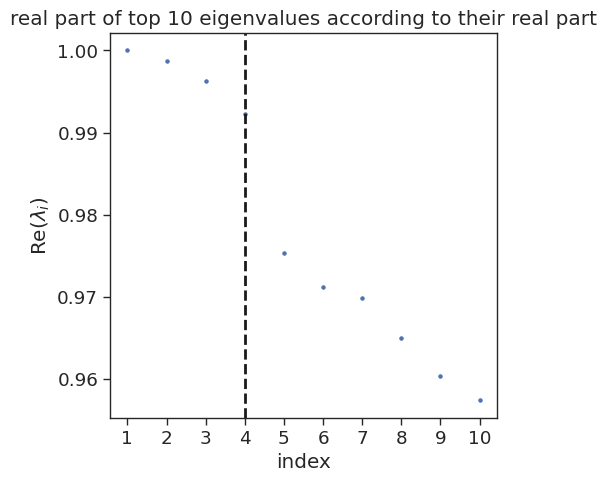

In [23]:
import matplotlib.pyplot as plt
g.compute_schur(n_components=10)
g.plot_spectrum(real_only=True)
plt.show()

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


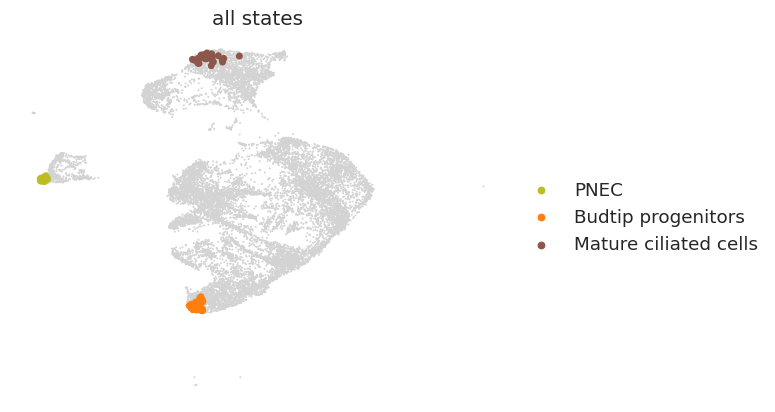

In [24]:
g.fit(cluster_key="cell_type", n_states=3)
g.plot_macrostates(which='all', discrete=True, legend_loc="right", s=100)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


saving figure to file figures/palantir_epithelial_terminal_states.pdf


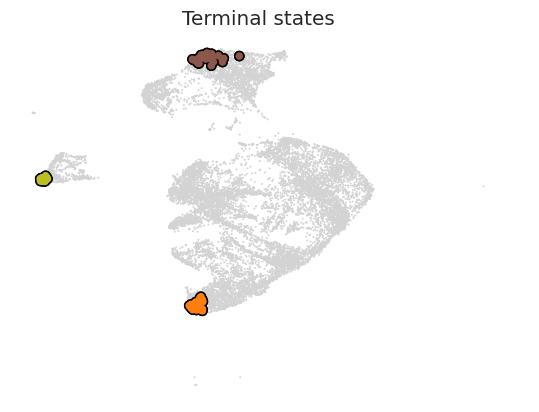

In [25]:
g.predict_terminal_states(allow_overlap=False)
g.plot_macrostates(which="terminal", legend_loc="right", s=100,
                  add_outline=[], outline_color=('black','black'),
                   outline_width=(0.00,0.2),
                  title='Terminal states',
                  save='figures/palantir_epithelial_terminal_states.pdf')

In [26]:
g.compute_fate_probabilities()

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/3 [00:00<?, ?/s]

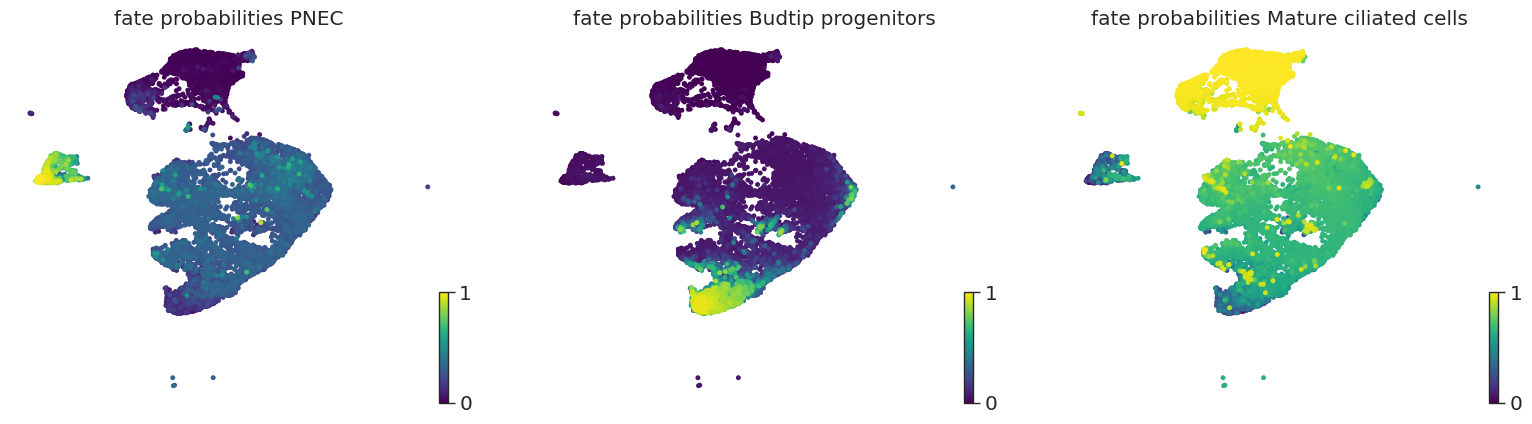

In [27]:
g.plot_fate_probabilities(same_plot=False, size=50, vmax=1, vmin=0)

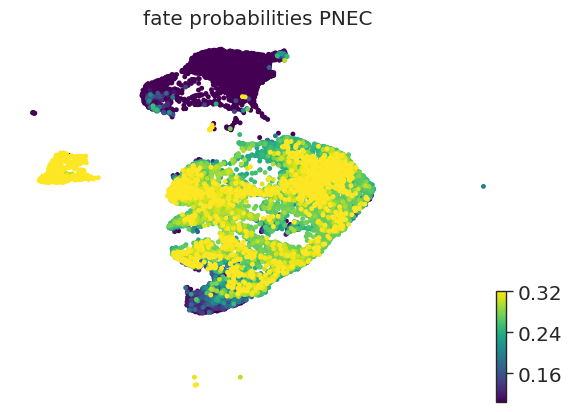

In [28]:
g.plot_fate_probabilities(same_plot=False, states=['PNEC'], perc=[25,90],
                          size=50)

saving figure to file figures/palantir_ciliated_fate_map.pdf


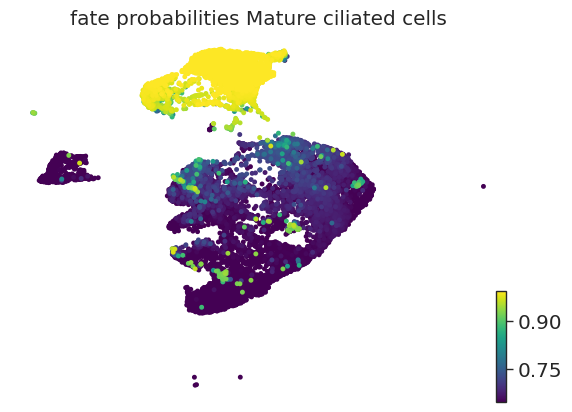

In [29]:
g.plot_fate_probabilities(same_plot=False, states=['Mature ciliated cells'], perc=[45,90],
                          size=50, save='figures/palantir_ciliated_fate_map.pdf')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


saving figure to file figures/palantir_pnec_fate_map.pdf


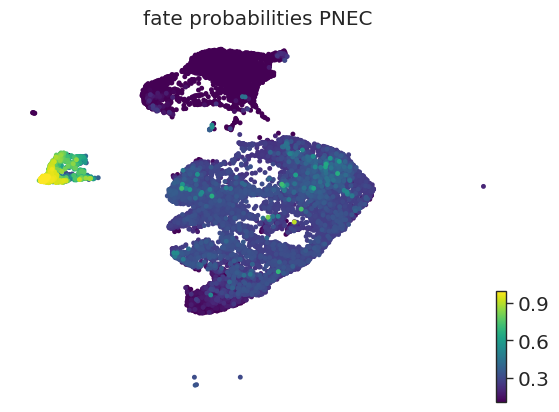

In [30]:
g.plot_fate_probabilities(same_plot=False, states=['PNEC'], perc=[25,100],
                          size=50, save='figures/palantir_pnec_fate_map.pdf')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


saving figure to file figures/palantir_budtip_fate_map.pdf


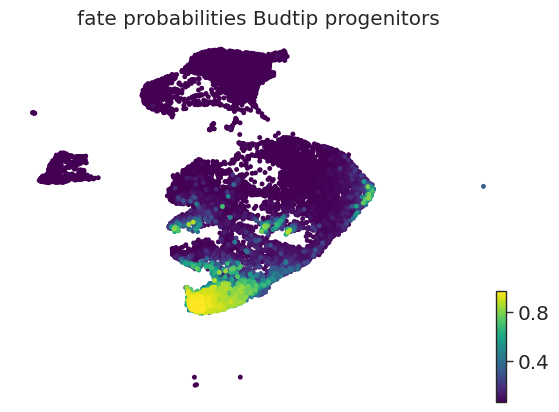

In [31]:
g.plot_fate_probabilities(same_plot=False, states=['Budtip progenitors'], perc=[55,100],
                          size=50,
                           save='figures/palantir_budtip_fate_map.pdf')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


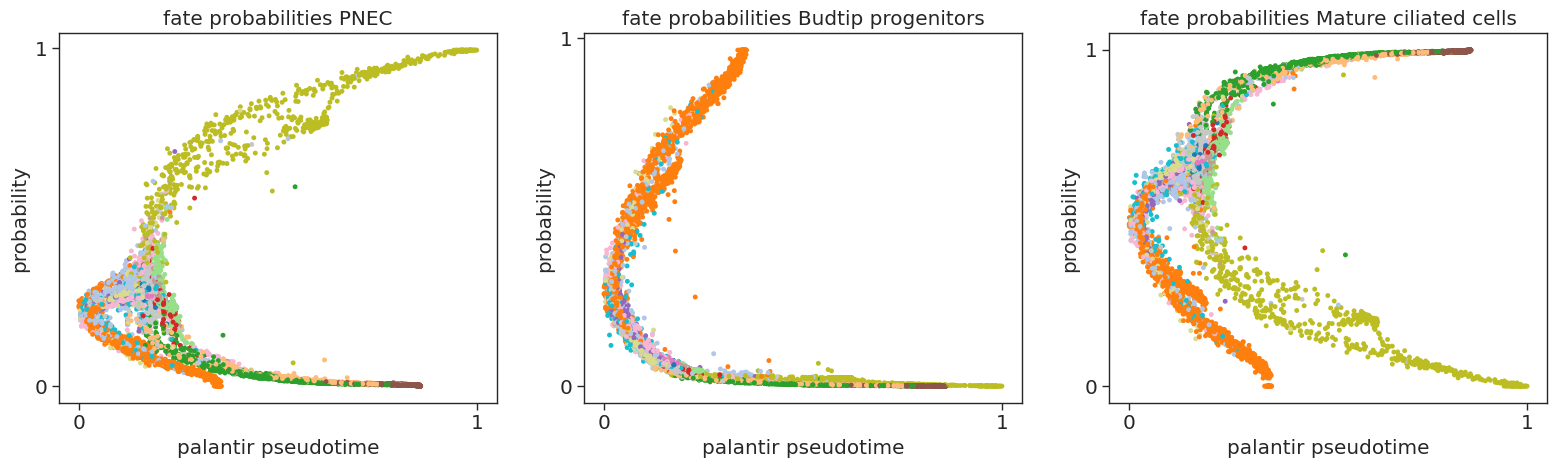

In [32]:
g.plot_fate_probabilities(same_plot=False, size=50, mode='time', time_key='palantir_pseudotime',
                         color='cell_type', legend_loc='none')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


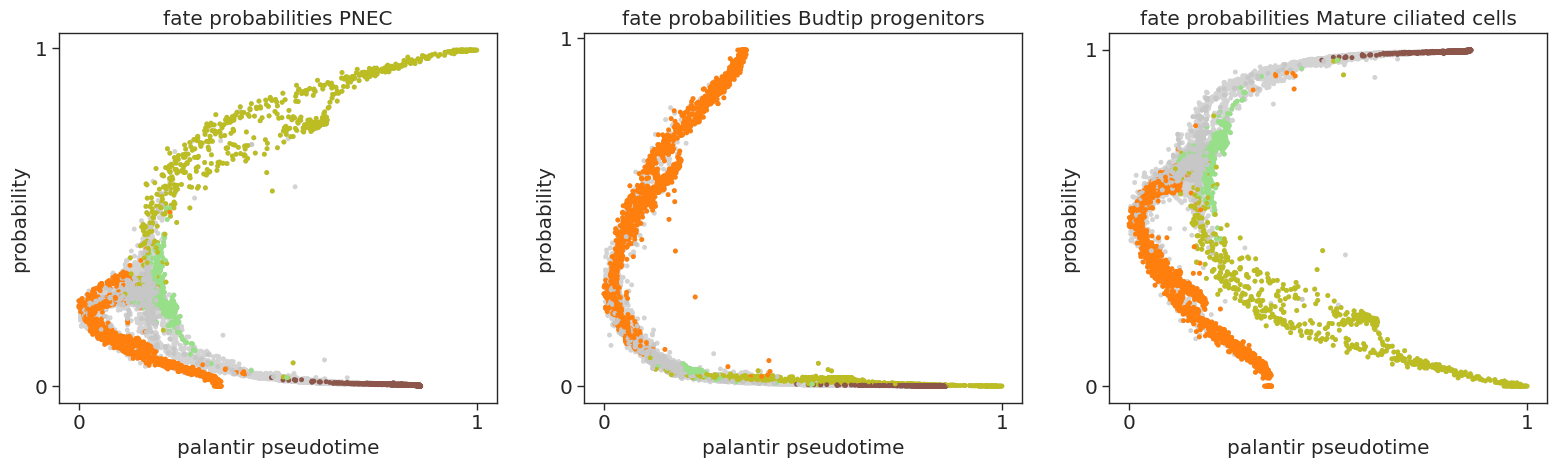

In [33]:
g.plot_fate_probabilities(same_plot=False, size=50, mode='time', time_key='palantir_pseudotime',
                         color='cell_type', legend_loc='none',
                         groups=['SCGB3A2+SFTPB+CFTR+ cells', 'Stromal-like cells 1',
                                'Budtip progenitors', 'PNEC', 'Mature ciliated cells'])

In [34]:
adata.obs['pnec_prob'] = adata.obsm['lineages_fwd']['PNEC'].X
adata.obs['ciliated_prob'] = adata.obsm['lineages_fwd']['Mature ciliated cells'].X
adata.obs['budtip_prob'] = adata.obsm['lineages_fwd']['Budtip progenitors'].X

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
adata.obs['Gestational week'] = ['GW'+x for x in adata.obs.GW.astype(str)]
adata.obs.GW = adata.obs.GW.astype(float)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


saving figure to file figures/Ciliated_TP_fate_prob_pseudotime.pdf


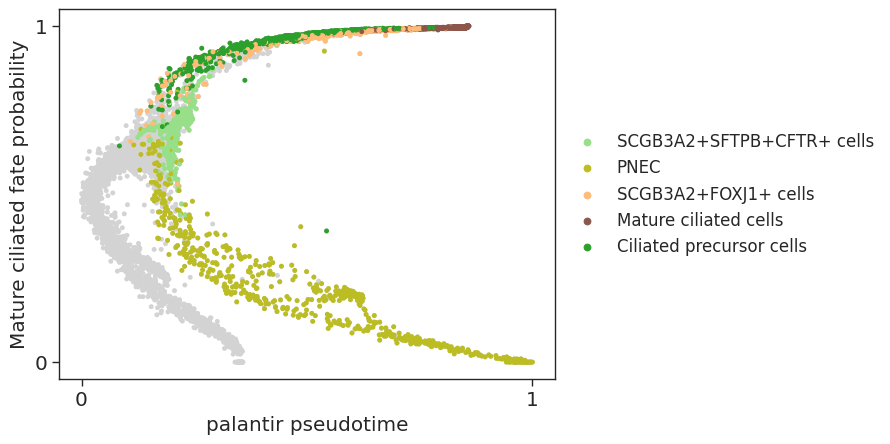

saving figure to file figures/PNEC_TP_fate_prob_pseudotime.pdf


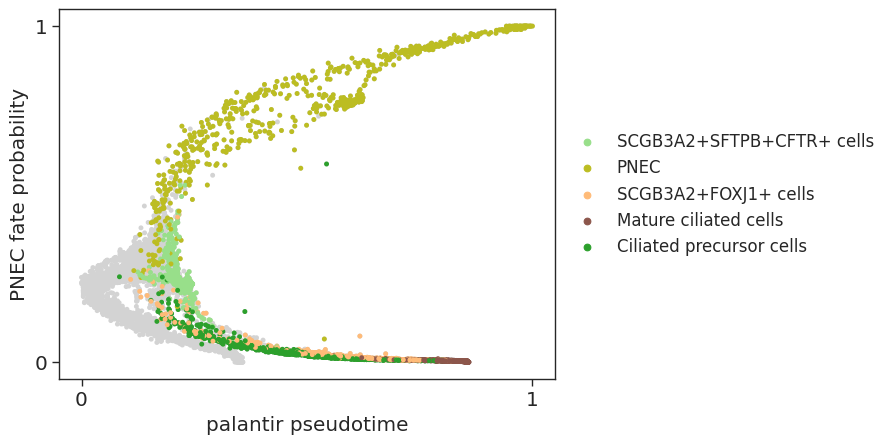

In [36]:
scv.pl.scatter(adata, x='palantir_pseudotime', y='ciliated_prob', color='cell_type', legend_loc='right',
              size=50, groups=['SCGB3A2+SFTPB+CFTR+ cells', 'PNEC', 'SCGB3A2+FOXJ1+ cells',
                              'Mature ciliated cells', 'Ciliated precursor cells'],
               legend_fontsize=12,
              ylabel='Mature ciliated fate probability', title='',
              save='figures/Ciliated_TP_fate_prob_pseudotime.pdf')

scv.pl.scatter(adata, x='palantir_pseudotime', y='pnec_prob', color='cell_type', legend_loc='right',
              size=50, groups=['SCGB3A2+SFTPB+CFTR+ cells', 'PNEC', 'SCGB3A2+FOXJ1+ cells',
                              'Mature ciliated cells', 'Ciliated precursor cells'],
               legend_fontsize=12,
              ylabel='PNEC fate probability', title='',
               save='figures/PNEC_TP_fate_prob_pseudotime.pdf')

In [37]:
epi_palette =  {'Basal cells':'#1f77b4', 'Budtip progenitors':'#ff7f0e', 'Ciliated precursor cells':'#2ca02c', 'Club cells':'#d62728', 'Early AT2-like cells':'#9467bd', 'Mature ciliated cells':'#8c564b', 'NKX2-1+SOX9+CFTR+ cells':'#e377c2', 'NRGN+ cells':'#7f7f7f', 'PNEC':'#bcbd22', 'PTEN+STAT3+ cells':'#17becf', 'Proliferating progenitors':'#aec7e8', 'SCGB3A2+FOXJ1+ cells':'#ffbb78', 'SCGB3A2+SFTPB+CFTR+ cells':'#98df8a', 'SMG basal cells':'#ff9896', 'SMG secretory cells':'#c5b0d5', 'SOX2lowCFTR+ cells': '#f7b6d2', 'SOX2highCFTR+ cells': '#c49c94', 'Stromal-like cells 1':'#5A5A5A', 'Stromal-like cells 2':'#dbdb8d',
               'hPSC fetal lung cells':'#a55194', 'hPSC organoids': '#8ca252'} 

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


saving figure to file figures/Ciliated_stromallike_fate_prob_pseudotime.pdf


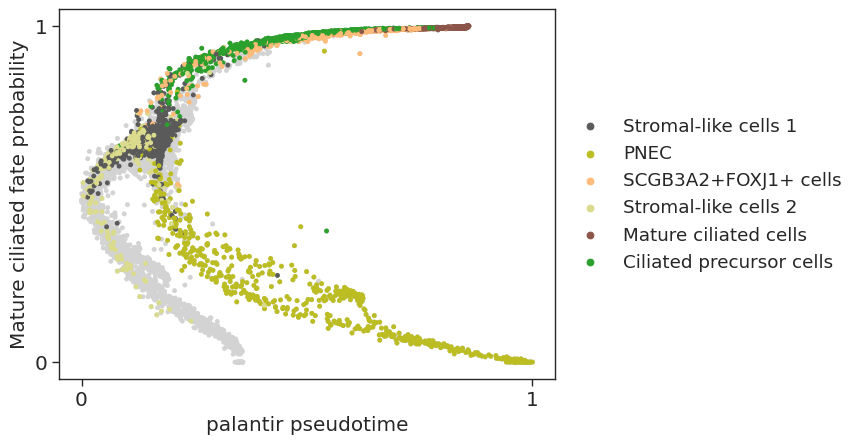

saving figure to file figures/PNEC_stromallike_fate_prob_pseudotime.pdf


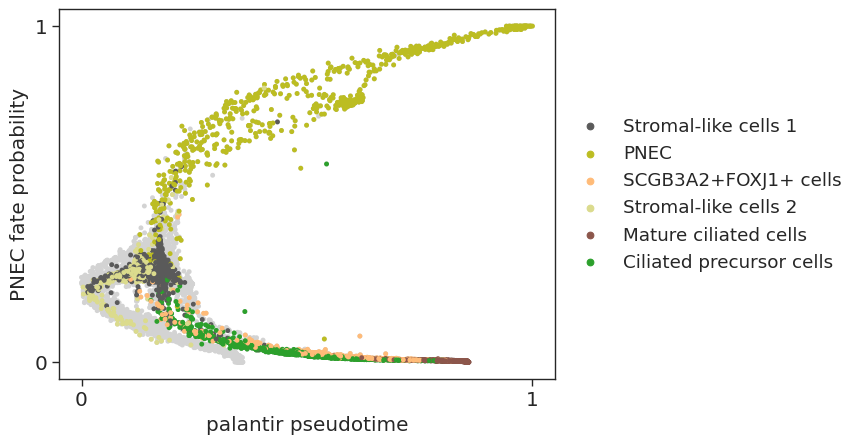

In [38]:
scv.pl.scatter(adata, x='palantir_pseudotime', y='ciliated_prob', color='cell_type', legend_loc='right',
              size=50, groups=['Stromal-like cells 1', 'PNEC', 'SCGB3A2+FOXJ1+ cells',
                               'Stromal-like cells 2',
                              'Mature ciliated cells', 'Ciliated precursor cells'],
              ylabel='Mature ciliated fate probability', palette=epi_palette, title='',
               save='figures/Ciliated_stromallike_fate_prob_pseudotime.pdf')


scv.pl.scatter(adata, x='palantir_pseudotime', y='pnec_prob', color='cell_type', legend_loc='right',
              size=50, groups=['Stromal-like cells 1', 'PNEC', 'SCGB3A2+FOXJ1+ cells',
                               'Stromal-like cells 2',
                              'Mature ciliated cells', 'Ciliated precursor cells'],
              ylabel='PNEC fate probability', palette=epi_palette, title='',
               save='figures/PNEC_stromallike_fate_prob_pseudotime.pdf')


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


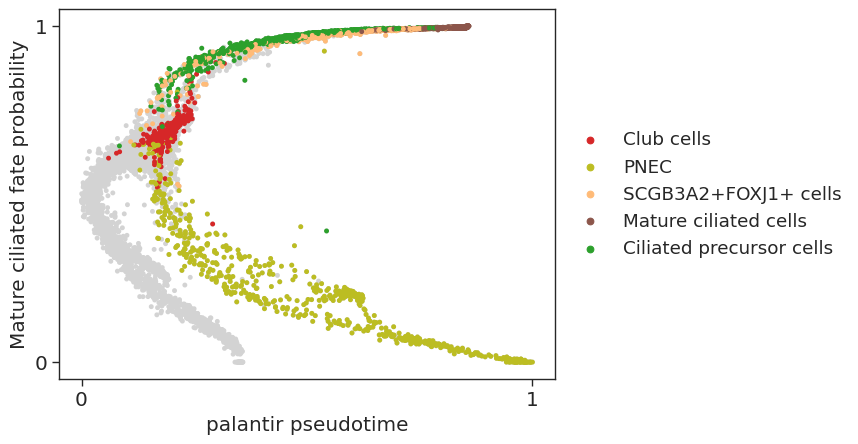

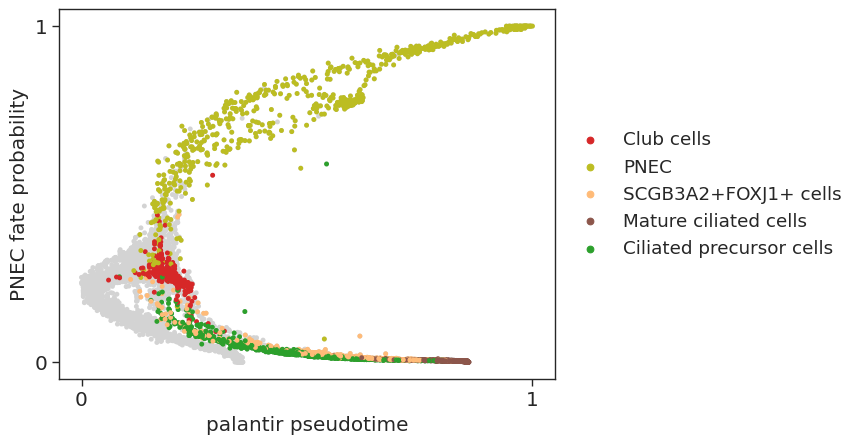

In [39]:
scv.pl.scatter(adata, x='palantir_pseudotime', y='ciliated_prob', color='cell_type', legend_loc='right',
              size=50, groups=['Club cells', 'PNEC', 'SCGB3A2+FOXJ1+ cells',
                              'Mature ciliated cells', 'Ciliated precursor cells'],
              ylabel='Mature ciliated fate probability', palette=epi_palette, title='')


scv.pl.scatter(adata, x='palantir_pseudotime', y='pnec_prob', color='cell_type', legend_loc='right',
              size=50, groups=['Club cells', 'PNEC', 'SCGB3A2+FOXJ1+ cells',
                              'Mature ciliated cells', 'Ciliated precursor cells'],
              ylabel='PNEC fate probability', palette=epi_palette, title='')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


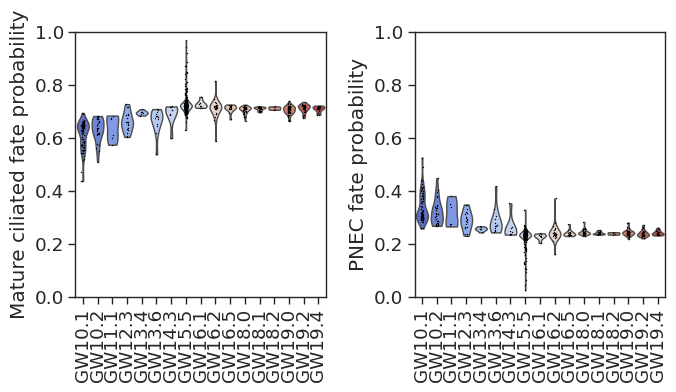

In [40]:
fig,ax=plt.subplots(1,2,figsize=(7,4))
ax=ax.flatten()
sc.pl.violin(adata[adata.obs.cell_type=='SCGB3A2+SFTPB+CFTR+ cells'], groupby='Gestational week',
            keys='ciliated_prob', palette='coolwarm',
            rotation=90, ax=ax[0], show=False)
sc.pl.violin(adata[adata.obs.cell_type=='SCGB3A2+SFTPB+CFTR+ cells'], groupby='Gestational week',
            keys='pnec_prob', palette='coolwarm',
            rotation=90, ax=ax[1], show=False)

#ax[0].set_ylim(0.74,0.84)
#ax[1].set_ylim(0.14,0.2)

ax[0].set_ylabel('Mature ciliated fate probability')
ax[1].set_ylabel('PNEC fate probability')

ax[0].set_ylim(0.,1)
ax[1].set_ylim(0.,1)

plt.tight_layout()
plt.savefig('figures/palantir_fate_probs.pdf')
plt.show()

In [42]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.rename_categories({
                                                                      'Early AT2-like cells': 'Tip cells'})

In [47]:
adata.obs[['ciliated_prob', 'pnec_prob', 'budtip_prob','palantir_pseudotime','cell_type','UMAP1', 'UMAP2','Gestational week']]

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ciliated_prob,pnec_prob,budtip_prob,palantir_pseudotime,cell_type,UMAP1,UMAP2,Gestational week
id,,,,,,,,
AAACCCAGTGACATCT-1_1,0.603197,0.333533,0.063270,0.147160,Proliferating progenitors,-3.480067,-5.124712,GW10.1
AAACCCAGTTACACTG-1_1,0.619318,0.325146,0.055536,0.171718,Tip cells,0.133211,-5.490242,GW10.1
AAACCCATCCCATAGA-1_1,0.623108,0.312458,0.064435,0.149924,Tip cells,2.229459,-5.401114,GW10.1
AAAGGGCCAAGGTCAG-1_1,0.640620,0.308741,0.050639,0.193563,SOX2highCFTR+ cells,2.900753,0.855120,GW10.1
AAAGGGCAGACAACTA-1_1,0.078308,0.913524,0.008168,0.675984,PNEC,-9.806458,1.952178,GW10.1
...,...,...,...,...,...,...,...,...
TTTCACAGTCGTCAGC-1_20,0.664819,0.266734,0.068447,0.172868,NKX2-1+SOX9+CFTR+ cells,4.710342,-2.168809,GW19.4
TTTACCAGTTTGTTGG-1_20,0.649169,0.289805,0.061026,0.175578,Basal cells,-0.954018,1.797443,GW19.4
TTGTTGTAGCGACTTT-1_20,0.668894,0.265558,0.065548,0.183207,NKX2-1+SOX9+CFTR+ cells,4.536842,-1.574239,GW19.4


In [48]:
fate_prob_df = adata.obs[['ciliated_prob', 'pnec_prob', 'budtip_prob','palantir_pseudotime','cell_type','UMAP1', 'UMAP2','Gestational week']]
fate_prob_df.to_csv('data/palantir_fate_probs.csv')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
from scipy.stats import spearmanr
rho_ciliated = spearmanr(adata[adata.obs.cell_type=='SCGB3A2+SFTPB+CFTR+ cells'].obs.GW,
               adata[adata.obs.cell_type=='SCGB3A2+SFTPB+CFTR+ cells'].obs.ciliated_prob)

rho_pnec = spearmanr(adata[adata.obs.cell_type=='SCGB3A2+SFTPB+CFTR+ cells'].obs.GW,
               adata[adata.obs.cell_type=='SCGB3A2+SFTPB+CFTR+ cells'].obs.pnec_prob)

print(rho_ciliated, rho_pnec)

SpearmanrResult(correlation=0.3135706739532501, pvalue=1.4895955298430175e-20) SpearmanrResult(correlation=-0.3326908011823902, pvalue=4.4253330435602825e-23)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


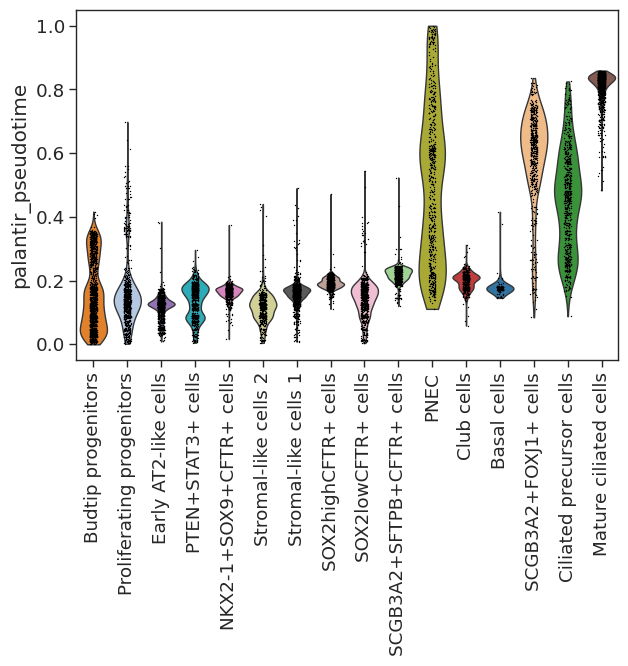

In [45]:
sc.pl.violin(
        adata,
        keys=["palantir_pseudotime"],
        groupby="cell_type",
        rotation=90,
    order = ['Budtip progenitors', 'Proliferating progenitors',
            'Early AT2-like cells', 'PTEN+STAT3+ cells', 'NKX2-1+SOX9+CFTR+ cells',
            'Stromal-like cells 2', 'Stromal-like cells 1', 'SOX2highCFTR+ cells', 
            'SOX2lowCFTR+ cells', 'SCGB3A2+SFTPB+CFTR+ cells', 'PNEC','Club cells',
             'Basal cells', 'SCGB3A2+FOXJ1+ cells',
            'Ciliated precursor cells', 'Mature ciliated cells'],
)

In [76]:
adata.write('data/cellrank_palantir.h5ad')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


saving figure to file figures/palantir_transitions_stream.pdf


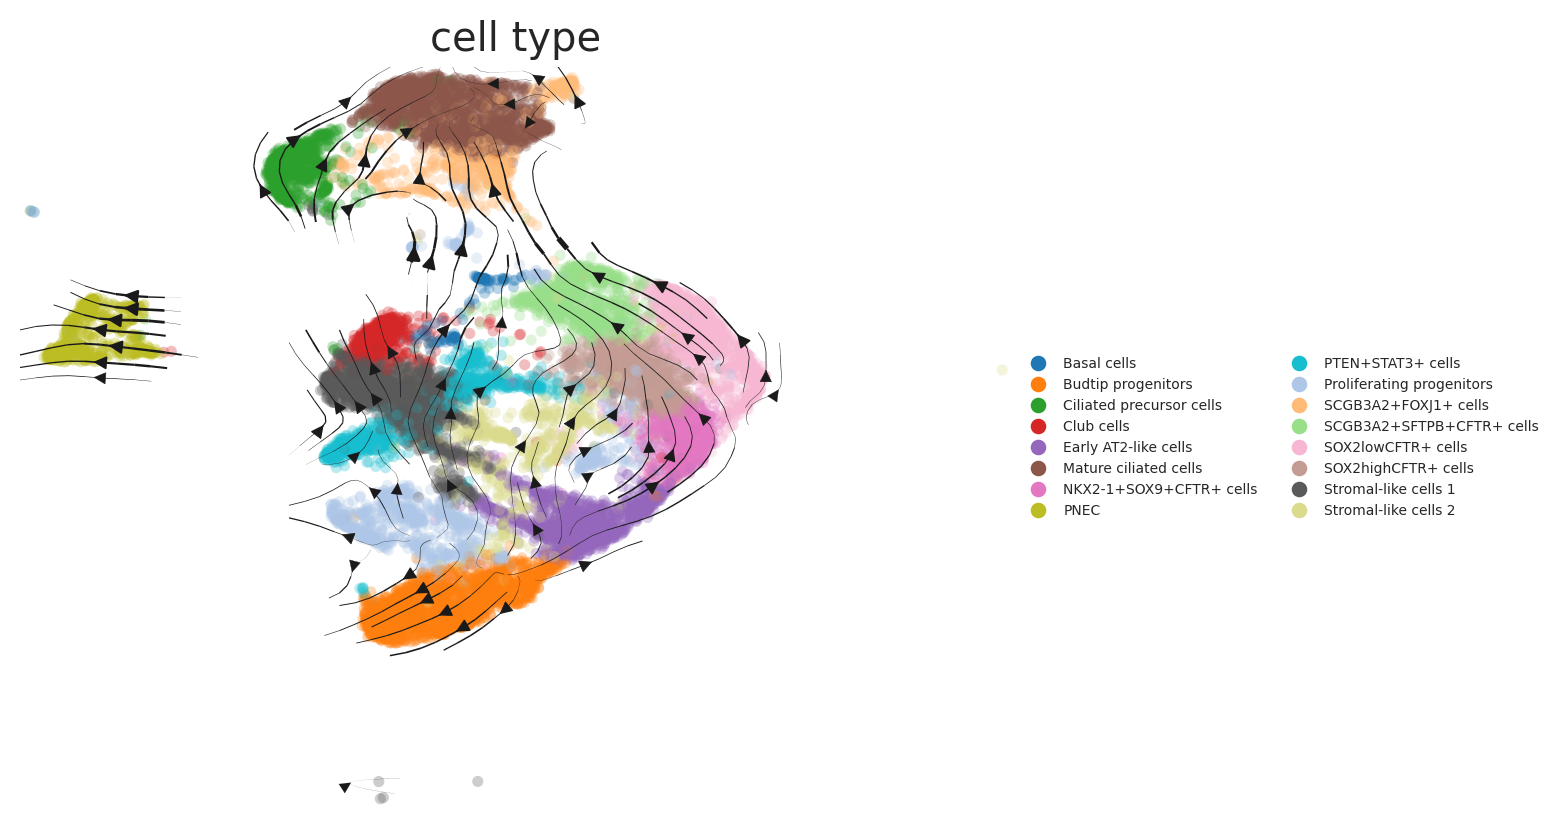

In [46]:
pk.plot_projection(color="cell_type", recompute=True, basis="X_umap", dpi=200, legend_fontsize=5,
                  cutoff_perc=0, legend_loc='right',
                  save='figures/palantir_transitions_stream.pdf')